In [2]:
# Import dependencies
from ipynb.fs.full.Using_permutations_to_shuffle_cards import *;

## Predicting red cards in a shuffled deck

In [3]:
# Modeling a 52-card deck
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

In [4]:
# Shuffling a 52-card deck
np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)

In [5]:
# Coding a card game strategy
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    remaining_total_cards = 52 - i - 1
    if remaining_red_cards / remaining_total_cards > 0.5:
        break
print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 0.
The next card in the deck is red.
We have won!


In [6]:
# Generalizing the card game strategy
np.random.seed(0)
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None, return_index=False):
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)
        
    remaining_red_cards = total_red_cards
    
    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        fraction_red_cards = remaining_red_cards / (total_cards - i - 1)
        if fraction_red_cards > min_fraction_red:
            break
            
    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]        
    

## Estimating the probability of strategy success


In [7]:
# Running the strategy over 1,000 shuffles
observations = np.array([execute_strategy() for _ in range(1000)])

In [8]:
# Computing the frequency of wins
frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.511


In [9]:
# Computing total profit
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit:.2f}")

Total profit is $22.00


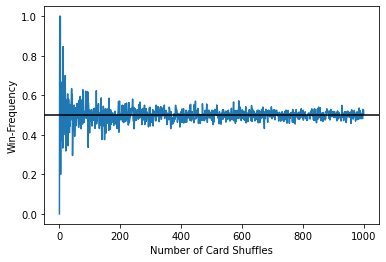

The win-frequency for 10,000 shuffles is 0.5035035035035035


In [10]:
# Plotting simulated frequencies of wins
np.random.seed(0)
def repeat_game(number_repeats):
    observations = np.array([execute_strategy() for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))
    
plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Card Shuffles')
plt.ylabel('Win-Frequency')
plt.show()
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")    

The frequency range 0.690437 - 0.691740 represents a 97.00% confidence interval


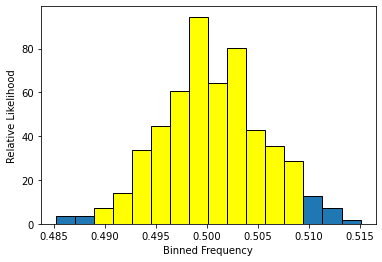

In [11]:
# Computing the confidence interval for 3 million shuffles
np.random.seed(0)
frequency_array = np.array([repeat_game(10000) for _ in range(300)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]

start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

In [12]:
# Computing the confidence interval for 150 million shuffles
np.random.seed(0)
frequency_array = np.array([repeat_game(50000) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.691503 - 0.693992 represents a 96.03% confidence interval


(11, 32)

In [13]:
# Computing the confidence interval for an updated strategy
np.random.seed(0)
def repeat_game(number_repeats, min_red_fraction):
    observations = np.array([execute_strategy(min_red_fraction) for _ in range(number_repeats)])
    return observations.mean()

frequency_array = np.array([repeat_game(50000, 0.75) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.691266 - 0.693755 represents a 96.43% confidence interval


(9, 30)

## Optimizing strategies using the sample space for a 10-card deck

In [14]:
# Applying a basic strategy to a 10-card deck
total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


In [15]:
# Applying multiple strategies to a 10-card deck
def scan_strategies():
    fractions = [value / 100 for value in range(50, 100)]
    probabilities = []
    for frac in fractions:
        win_condition = lambda x: execute_strategy(frac, shuffled_deck=np.array(x))
        probabilities.append(compute_event_probability(win_condition, sample_space))
    return probabilities

probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")

Lowest probability of win is 0.5
Highest probability of win is 0.5


In [18]:
# Applying multiple strategies to multiple decks
for total_cards in [2, 4, 6, 8]:
    total_red_cards = int(total_cards / 2)
    total_black_cards = total_red_cards
    unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
    
    sample_space = set(itertools.permutations(unshuffled_deck))
    probabilities = scan_strategies()
    if all(prob == 0.5 for prob in probabilities):
         print(f"No winning strategy found for deck of size {total_cards}")
    else:
        print(f"Winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


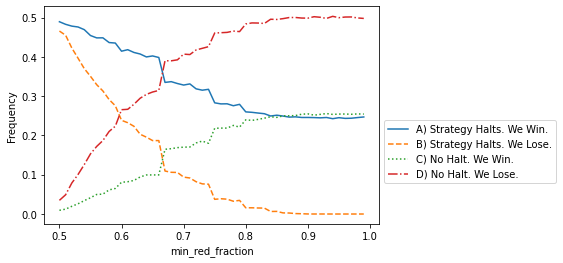

In [19]:
# Plotting strategy outcomes across a 52-card deck
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):
    observations = [execute_strategy(min_red_fraction, return_index=True) for _ in range(num_repeats)]
    successes = [index for index, card, in observations if card == 1]
    halt_success = len([index for index in successes if index != 51])
    no_halt_success = len(successes) - halt_success
    
    failures = [index for index, card, in observations if card == 0]
    halt_failure = len([index for index in failures if index != 51])
    no_halt_failure = len(failures) - halt_failure
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r / number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions:
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])
        
plt.plot(fractions, result_types[0], label='A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--', label='B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':', label='C) No Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.', label='D) No Halt. We Lose.')
plt.xlabel('min_red_fraction')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

In [20]:
# The optimal winning strategy
def optimal_strategy(shuffled_deck):
    return shuffled_deck[0]